# Correlation Analysis

Correlation analysis is a fundamental statistical tool used to study the relationship between two or more variables. The term "correlation" originates from the Latin correlatio, meaning a mutual relationship. In the realm of statistics, correlation is specifically employed as a "measure of association," which quantifies the strength and direction of a relationship between two variables.

Understanding correlation is essential in data science as it helps in predicting one variable based on the presence of another, determining the association between variables, and in feature selection during the modeling phase. Correlations are also often used as a starting point for a deeper understanding for a deeper, *causal* understanding of a certain system (we will later see that correlation and causation are very clearly **not** the same!). However, before delving into complex models, it's crucial to grasp the basics of measuring relationships through correlation.

In everyday life, we say that something *correlates* when different events or measurements align very well. Or we refer to things such as co-incidence. In the following, however, we are looking for a metric that can numerically describe whether a correlation exists and, if so, how pronounced it is.

### Covariance, (Pearson) Correlation Coefficient
**Covariance**  
A first step towards measuring correlation is through variance, which measures the spread of individual data points around the mean. Expanding from variance, we encounter **covariance**, a measure that extends the idea to two variables. Covariance quantifies how much two variables change together, but its value is scale-dependent, making it difficult to interpret directly.

The formula for covariance between two variables X and Y is given by:

$$
Cov(X, Y) = \frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x_i})(y_i - \bar{y_i})
$$

where $\bar{x_i}$ and $\bar{y_i}$​ are the means of $X$ and $Y$, respectively.

**Pearson Correlation Coefficient**  
To address the limitations of covariance, the **Pearson Correlation Coefficient** offers a normalized measure of correlation. This coefficient, often simply referred to as the correlation coefficient, is a dimensionless number between -1 and 1. It not only shows the strength but also the direction of the linear relationship between two variables.

The Pearson Correlation Coefficient is calculated as:

$$
Corr(X, Y) = \frac{Cov(X, Y)}{\sqrt{Var(X)}\sqrt{Var(Y)}}
$$

This formula normalizes the covariance by the product of the standard deviations of the variables, thus providing a clearer, scale-independent measure of their relationship.

Now let's have a hands-on look at what correlations look like, and how they can be quantified.

In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sb


# Set the ggplot style (optional)
plt.style.use("ggplot")

In [12]:
# OJO que esto es para los estudiantes de matemáticas
df_mat = pd.read_csv('student/student-mat.csv', delimiter=';')
df_por = pd.read_csv('student/student-por.csv', delimiter=';')

In [6]:
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [9]:
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [10]:
df_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [14]:
df_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

One way to look for interesting relationships between different features is simply to plot one variable (or feature) against another:

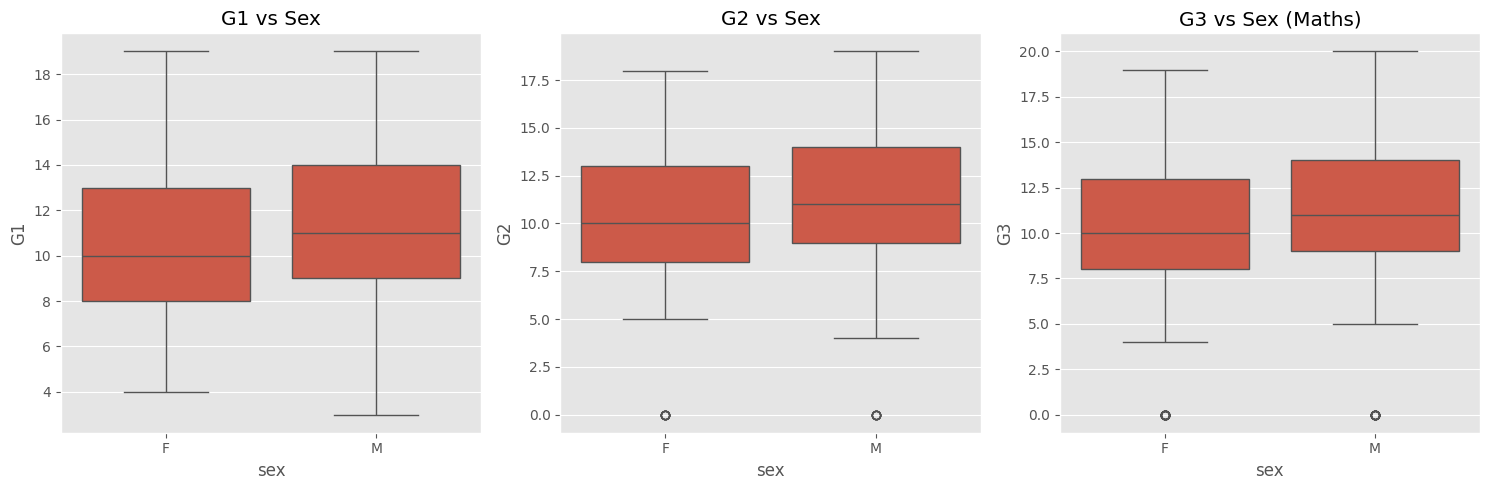

In [17]:
# Crea una figura con tres subplots (una fila y tres columnas)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Crea cada boxplot en un subplot específico
sb.boxplot(ax=axes[0], x='sex', y='G1', data=df_mat)
axes[0].set_title('G1 (Maths) vs Sex')

sb.boxplot(ax=axes[1], x='sex', y='G2', data=df_mat)
axes[1].set_title('G2 (Maths) vs Sex')

sb.boxplot(ax=axes[2], x='sex', y='G3', data=df_mat)
axes[2].set_title('G3 (Maths) vs Sex')

# Ajusta el espacio entre los subplots
plt.tight_layout()

# Muestra la figura completa
plt.show()

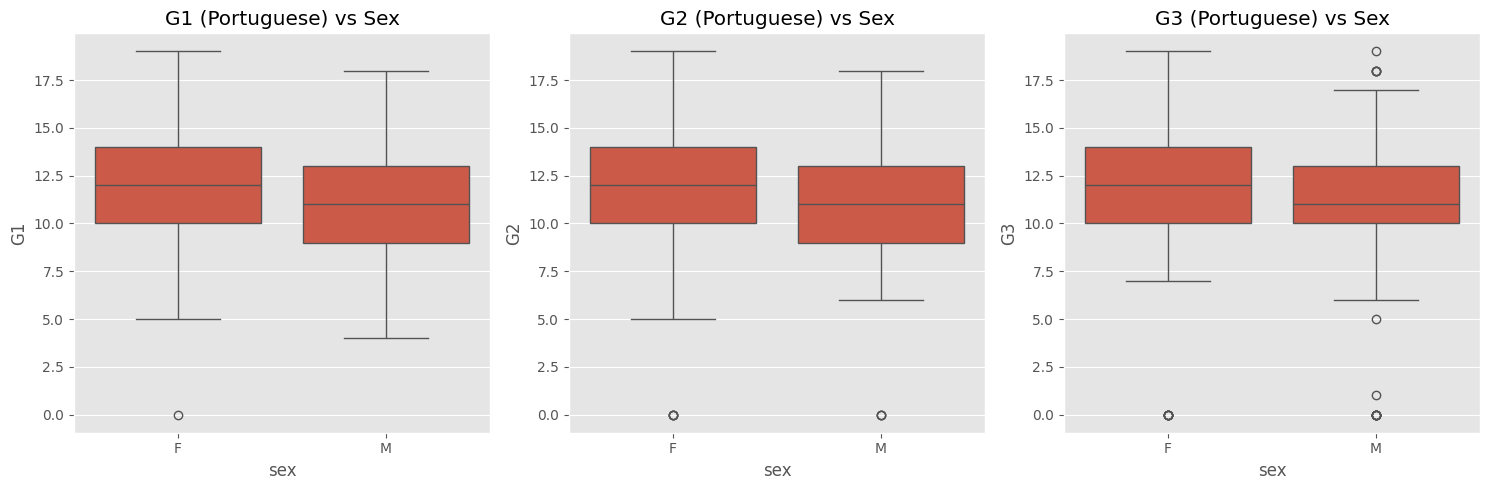

In [18]:
# Crea una figura con tres subplots (una fila y tres columnas)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Crea cada boxplot en un subplot específico
sb.boxplot(ax=axes[0], x='sex', y='G1', data=df_por)
axes[0].set_title('G1 (Portuguese) vs Sex')

sb.boxplot(ax=axes[1], x='sex', y='G2', data=df_por)
axes[1].set_title('G2 (Portuguese) vs Sex')

sb.boxplot(ax=axes[2], x='sex', y='G3', data=df_por)
axes[2].set_title('G3 (Portuguese) vs Sex')

# Ajusta el espacio entre los subplots
plt.tight_layout()

# Muestra la figura completa
plt.show()

Dos conclusiones:
- dt_mat: Los hombres contemplados en el dataset tienen mejores notas que las mujeres en la asignatura de matemáticas.
- dt_por: Los hombres contemplados en el dataset tienen peires notas que las mujeres en la asignatura de portugués.

In [19]:
df_mat.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [20]:
df_por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


**Basic cleaning or processing**

In the table above, some things seem weird. The minimum height is 1.63 and the maximum height is 364.0. Probably some fantasy figures, one apparently also with shoe size 88. This are typical issues we can quickly discover in a first inspection and then decide what to do about it. Here, we will simply decide to only take data within more or less realistic boundaries. 

**Question:** What does that actually mean?

Instead of as a matrix with values, the correlation matrix is often also graphically represented, especially for larger datasets, to easily spot particularly high and low coefficients.

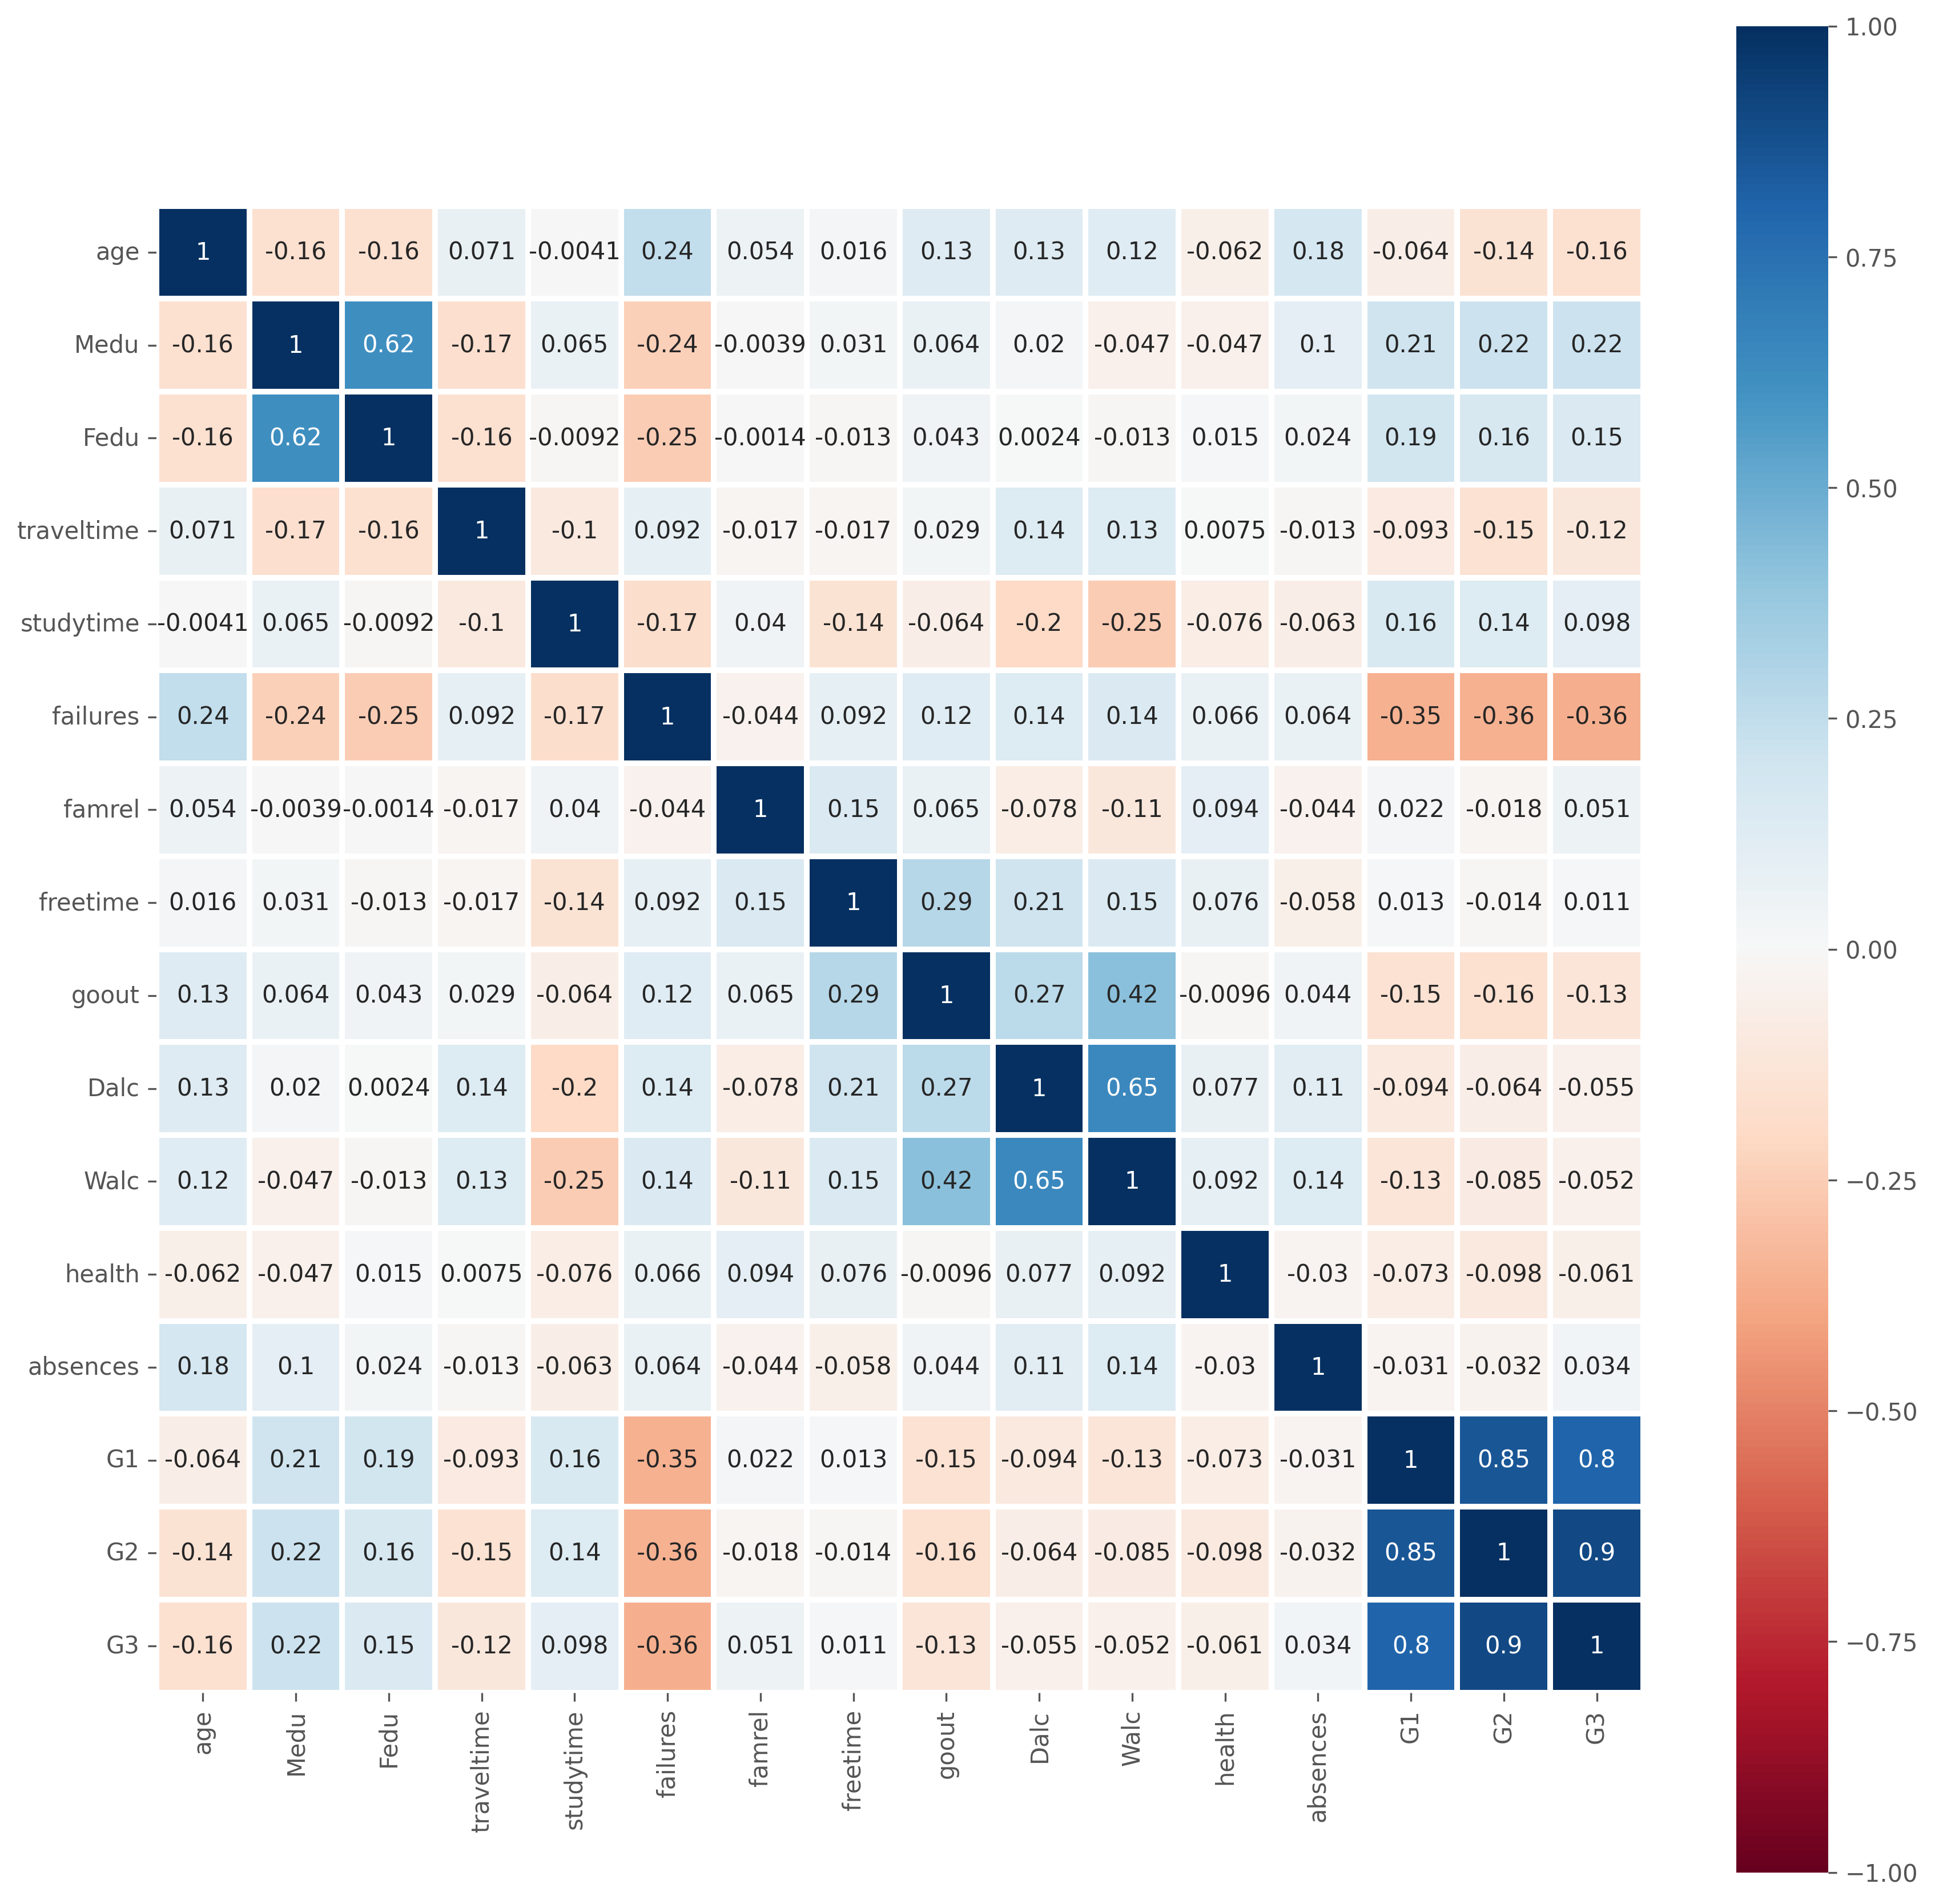

In [21]:
fig, ax = plt.subplots(figsize=(14, 14), dpi=300) 


sb.heatmap(
    df_mat.corr(numeric_only=True), 
    vmin=-1, vmax=1,
    square=True, lw=2,
    annot=True, cmap="RdBu",
    ax=ax,
)
plt.show()

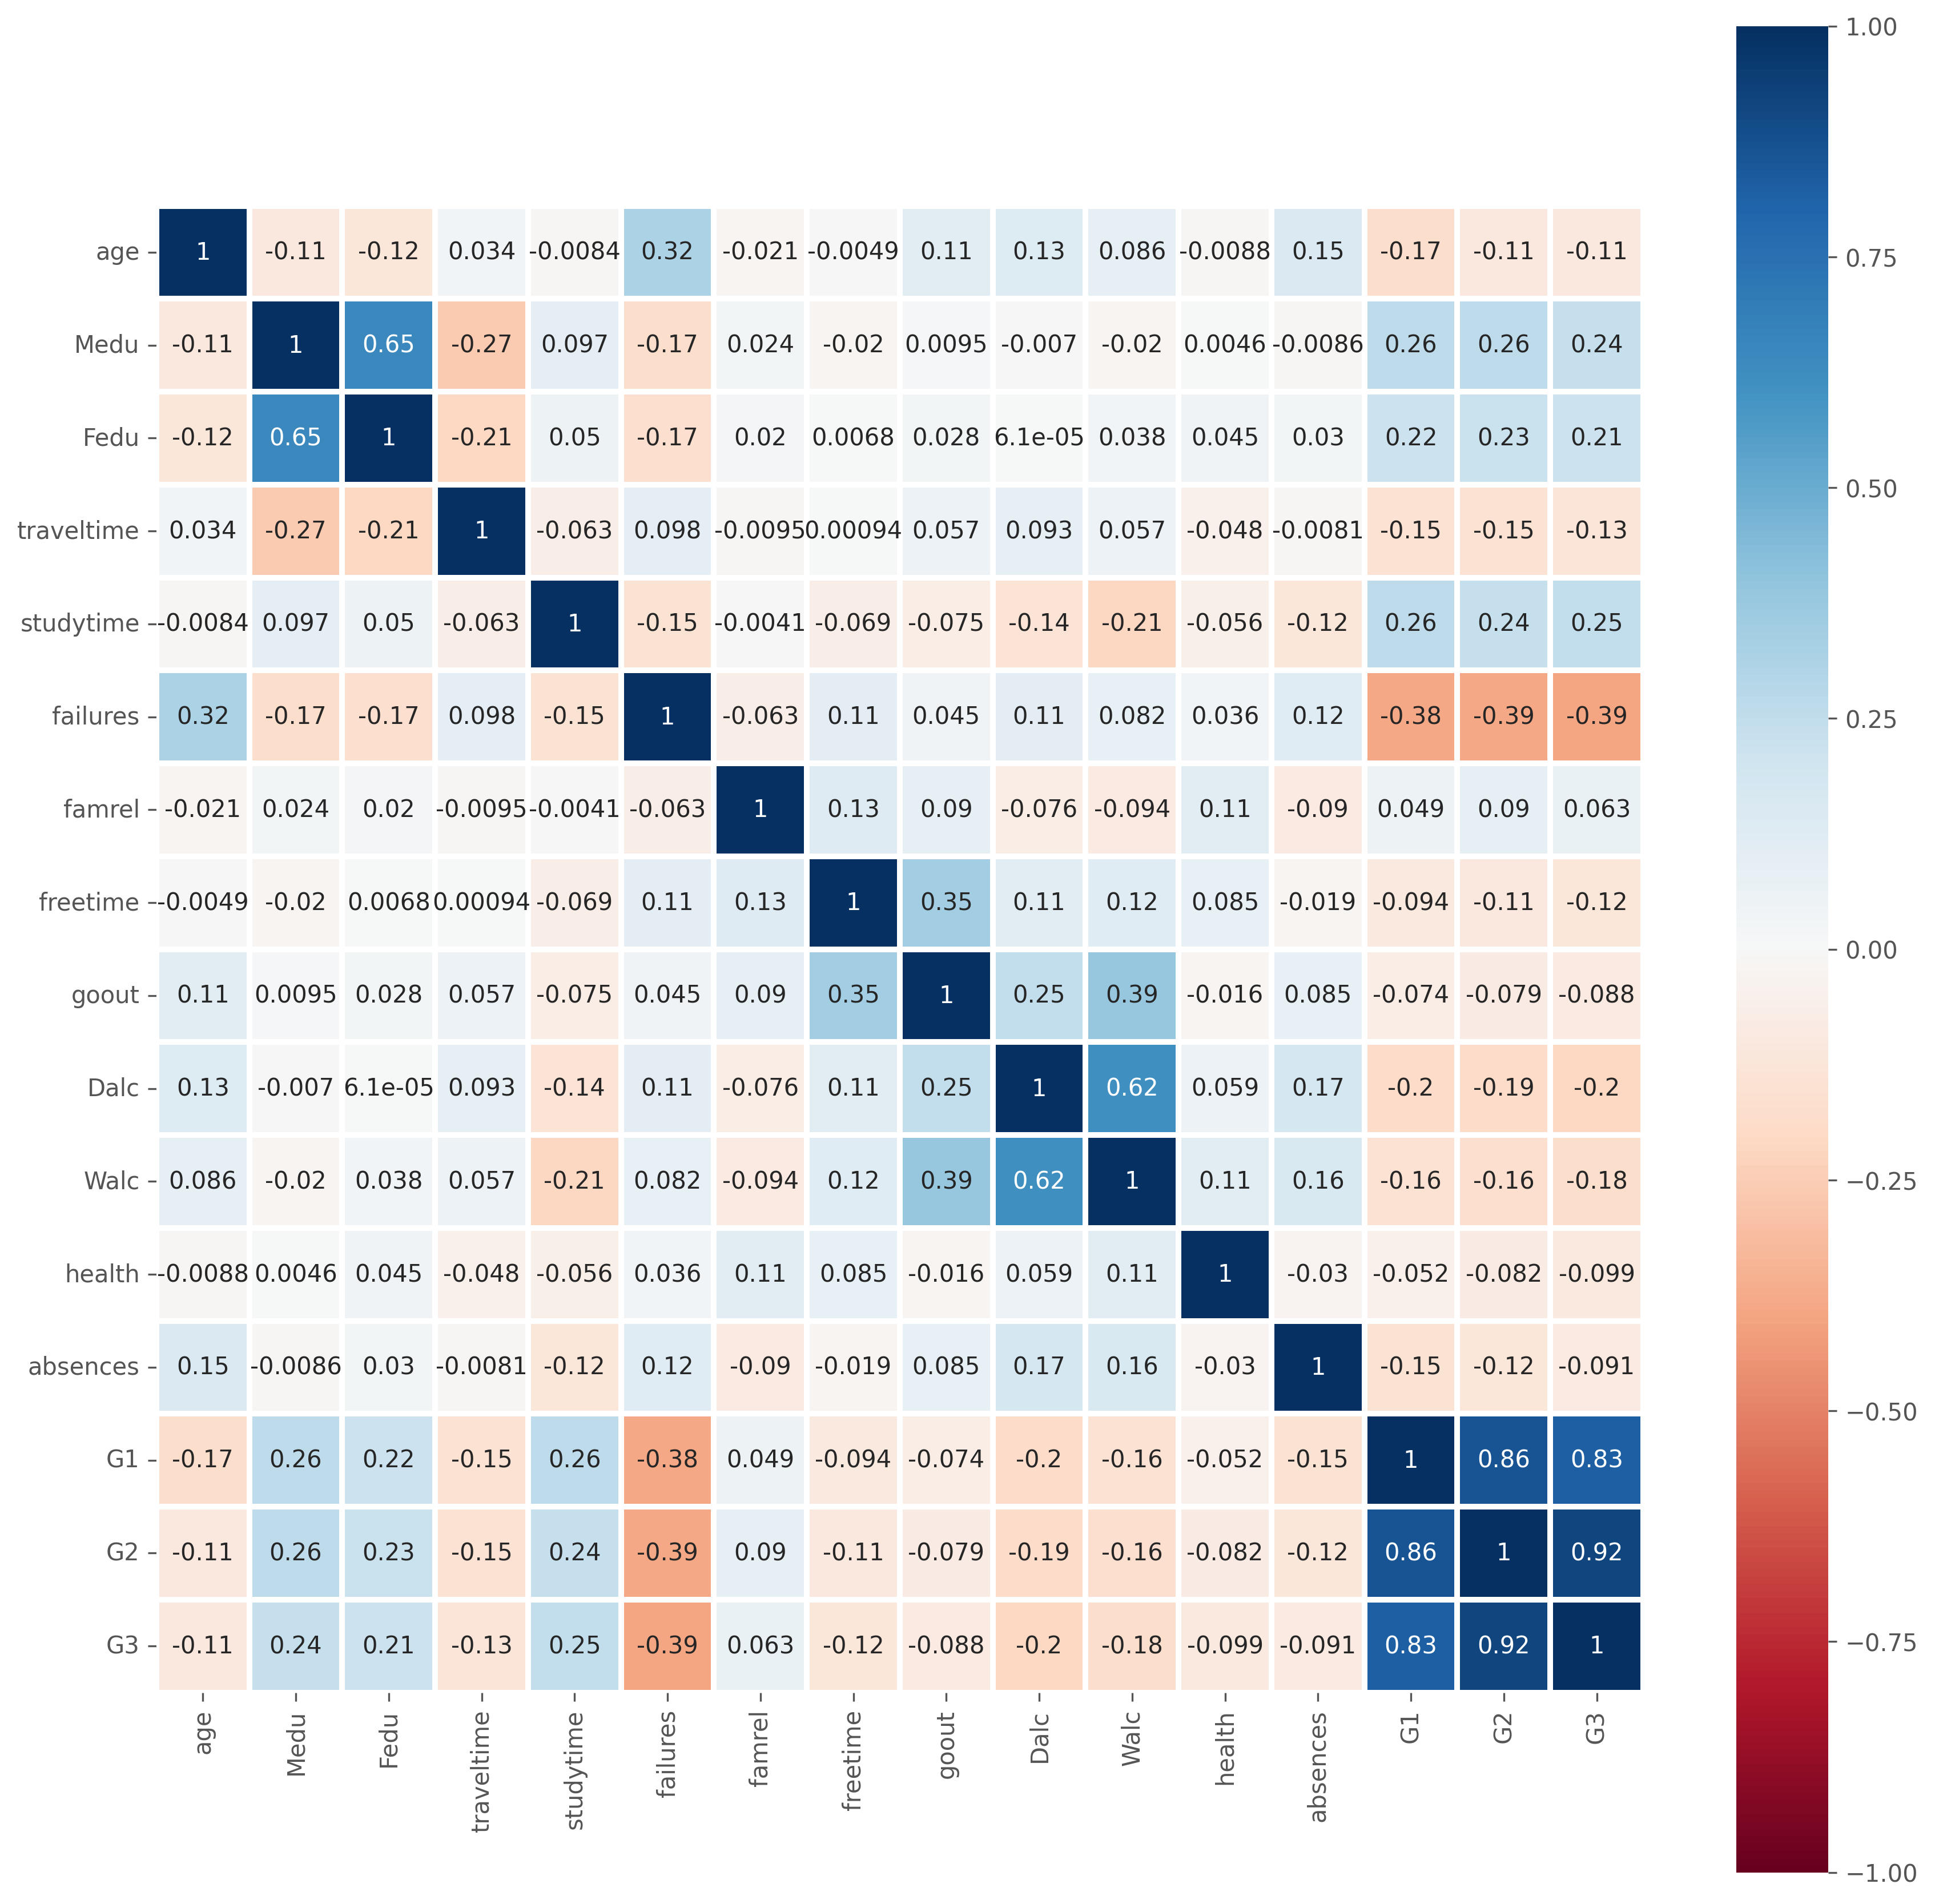

In [65]:
fig, ax = plt.subplots(figsize=(14, 14), dpi=300) 


sb.heatmap(
    df_por.corr(numeric_only=True), # Por defecto: method = 'pearson'. Podrías ser: 'kendall' y 'spearman'
    vmin=-1, vmax=1,
    square=True, lw=2,
    annot=True, cmap="RdBu",
    ax=ax,
)
plt.show()

Análisis Exploratorio de Variables Binarias

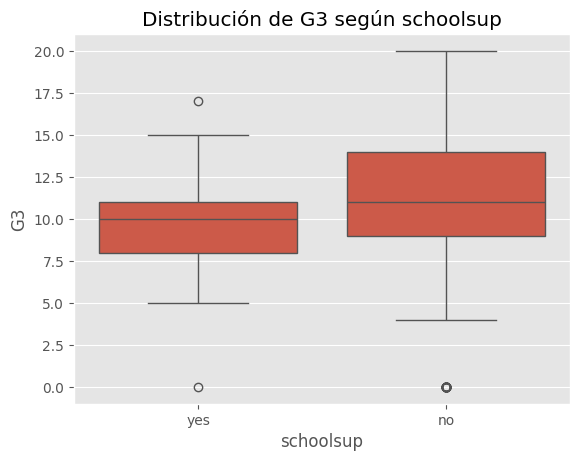

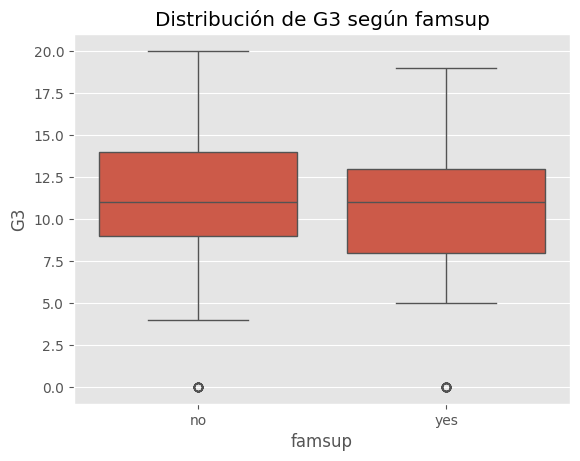

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Comparación de G3 con schoolsup
sns.boxplot(data=df, x='schoolsup', y='G3')
plt.title('Distribución de G3 según schoolsup')
plt.show()

# Comparación de G3 con famsup
sns.boxplot(data=df, x='famsup', y='G3')
plt.title('Distribución de G3 según famsup')
plt.show()


In [9]:
from scipy.stats import ttest_ind

# Prueba t para schoolsup
group_yes_mat = df_mat[df_mat['schoolsup'] == 'yes']['G3']
group_no_mat = df_mat[df_mat['schoolsup'] == 'no']['G3']
t_stat_mat, p_val_mat = ttest_ind(group_yes_mat, group_no_mat)
print("Prueba t para schoolsup: p-value =", p_val_mat)

# Prueba t para famsup
group_yes_mat = df_mat[df_mat['famsup'] == 'yes']['G3']
group_no_mat = df_mat[df_mat['famsup'] == 'no']['G3']
t_stat_mat, p_val_mat = ttest_ind(group_yes_mat, group_no_mat)
print("Prueba t para famsup: p-value =", p_val_mat)


Prueba t para schoolsup: p-value = 0.10038496363910417
Prueba t para famsup: p-value = 0.43771108589489893


- t_stat: es el valor del estadístico t, que mide la diferencia relativa entre las medias de los dos grupos.
- p_val: es el p-value, el cual nos indica si esta diferencia es significativa o no.

El p-value es un valor entre 0 y 1 que nos ayuda a decidir si hay evidencia suficiente para decir que existe una diferencia significativa entre grupos, o si esta diferencia puede haber surgido simplemente por azar.

    - p-value < 0.05: Existe una diferencia significativa entre los grupos. La variable podría ser relevante.
    - p-value ≥ 0.05: No existe una diferencia significativa entre los grupos. La variable probablemente no sea relevante.

Interpretación: Si el p-value es bajo (por ejemplo, menor a 0.05), entonces existe una diferencia significativa en las calificaciones finales entre los grupos "yes" y "no" de schoolsup o famsup, lo cual indica que podría ser relevante mantener esa variable en el modelo.

Análisis de la correlación o importancia en un Modelo Simplificado

In [25]:
""" from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Definir variables y dividir el dataset
X = df.drop(columns=['G3', 'schoolsup', 'famsup'])
y = df['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo sin schoolsup y famsup
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("MSE sin schoolsup y famsup:", mean_squared_error(y_test, y_pred))

# Agregar schoolsup y famsup y repetir el proceso
X_with_support = df.drop(columns=['G3'])
X_train, X_test, y_train, y_test = train_test_split(X_with_support, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
y_pred_with_support = model.predict(X_test)
print("MSE con schoolsup y famsup:", mean_squared_error(y_test, y_pred_with_support))
 """

' from sklearn.model_selection import train_test_split\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.metrics import mean_squared_error\n\n# Definir variables y dividir el dataset\nX = df.drop(columns=[\'G3\', \'schoolsup\', \'famsup\'])\ny = df[\'G3\']\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Entrenar modelo sin schoolsup y famsup\nmodel = LinearRegression()\nmodel.fit(X_train, y_train)\ny_pred = model.predict(X_test)\nprint("MSE sin schoolsup y famsup:", mean_squared_error(y_test, y_pred))\n\n# Agregar schoolsup y famsup y repetir el proceso\nX_with_support = df.drop(columns=[\'G3\'])\nX_train, X_test, y_train, y_test = train_test_split(X_with_support, y, test_size=0.2, random_state=42)\n\nmodel.fit(X_train, y_train)\ny_pred_with_support = model.predict(X_test)\nprint("MSE con schoolsup y famsup:", mean_squared_error(y_test, y_pred_with_support))\n '

Análisis de la importancia de variables (Feature Importance)

In [26]:
""" from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Entrenar un modelo de Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Obtener la importancia de las variables
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)
print(feature_importances)
 """

" from sklearn.ensemble import RandomForestRegressor\nimport pandas as pd\n\n# Entrenar un modelo de Random Forest\nrf = RandomForestRegressor()\nrf.fit(X_train, y_train)\n\n# Obtener la importancia de las variables\nfeature_importances = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})\nfeature_importances = feature_importances.sort_values(by='importance', ascending=False)\nprint(feature_importances)\n "

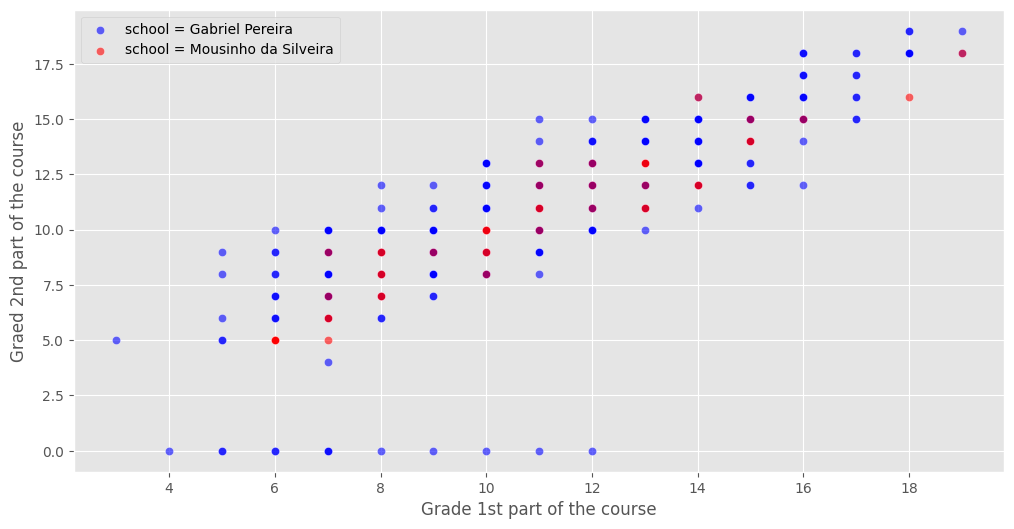

In [10]:
plt.figure(figsize=(12, 6))

# Graficar school = Gabriel Pereira
sb.scatterplot(x=df[df['school'] == 'GP']['mean_G'], y=df[df['school'] == 'GP']['G2'], color="blue", alpha=0.6, label="school = Gabriel Pereira")

# Graficar school = Mousinho da Silveira
sb.scatterplot(x=df[df['school'] == 'MS']['mean_G'], y=df[df['school'] == 'MS']['G2'], color="red", alpha=0.6, label="school = Mousinho da Silveira")

#plt.title("PSA by PV with SCP diagnosis")

plt.xlabel("Grade 1st part of the course")  
plt.ylabel("Graed 2nd part of the course") 

plt.legend()  # Mostrar la leyenda
plt.show()


# PREPRACIÓN DEL DATASET

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sb


# Set the ggplot style (optional)
plt.style.use("ggplot")

In [27]:
df_mat = pd.read_csv('student/student-mat.csv', delimiter=';')
df_por = pd.read_csv('student/student-por.csv', delimiter=';')

In [30]:
new_df_mat = df_mat.copy()

# Elimino G1 y G2 poque G3 es la media
new_df_mat.drop(['G1', 'G2'], axis=1, inplace=True)

# Agrego el consumo de alcohol
new_df_mat.drop(['Dalc', 'Walc'], axis=1, inplace=True)
new_df_mat['Malcohol'] = (df_mat['Walc'] + df_mat['Dalc'])/2

# Agrego la formación paternal
new_df_mat.drop(['Fedu', 'Medu'], axis=1, inplace=True)
new_df_mat['Edu'] = df_mat['Fedu'] + df_mat['Medu']

df_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

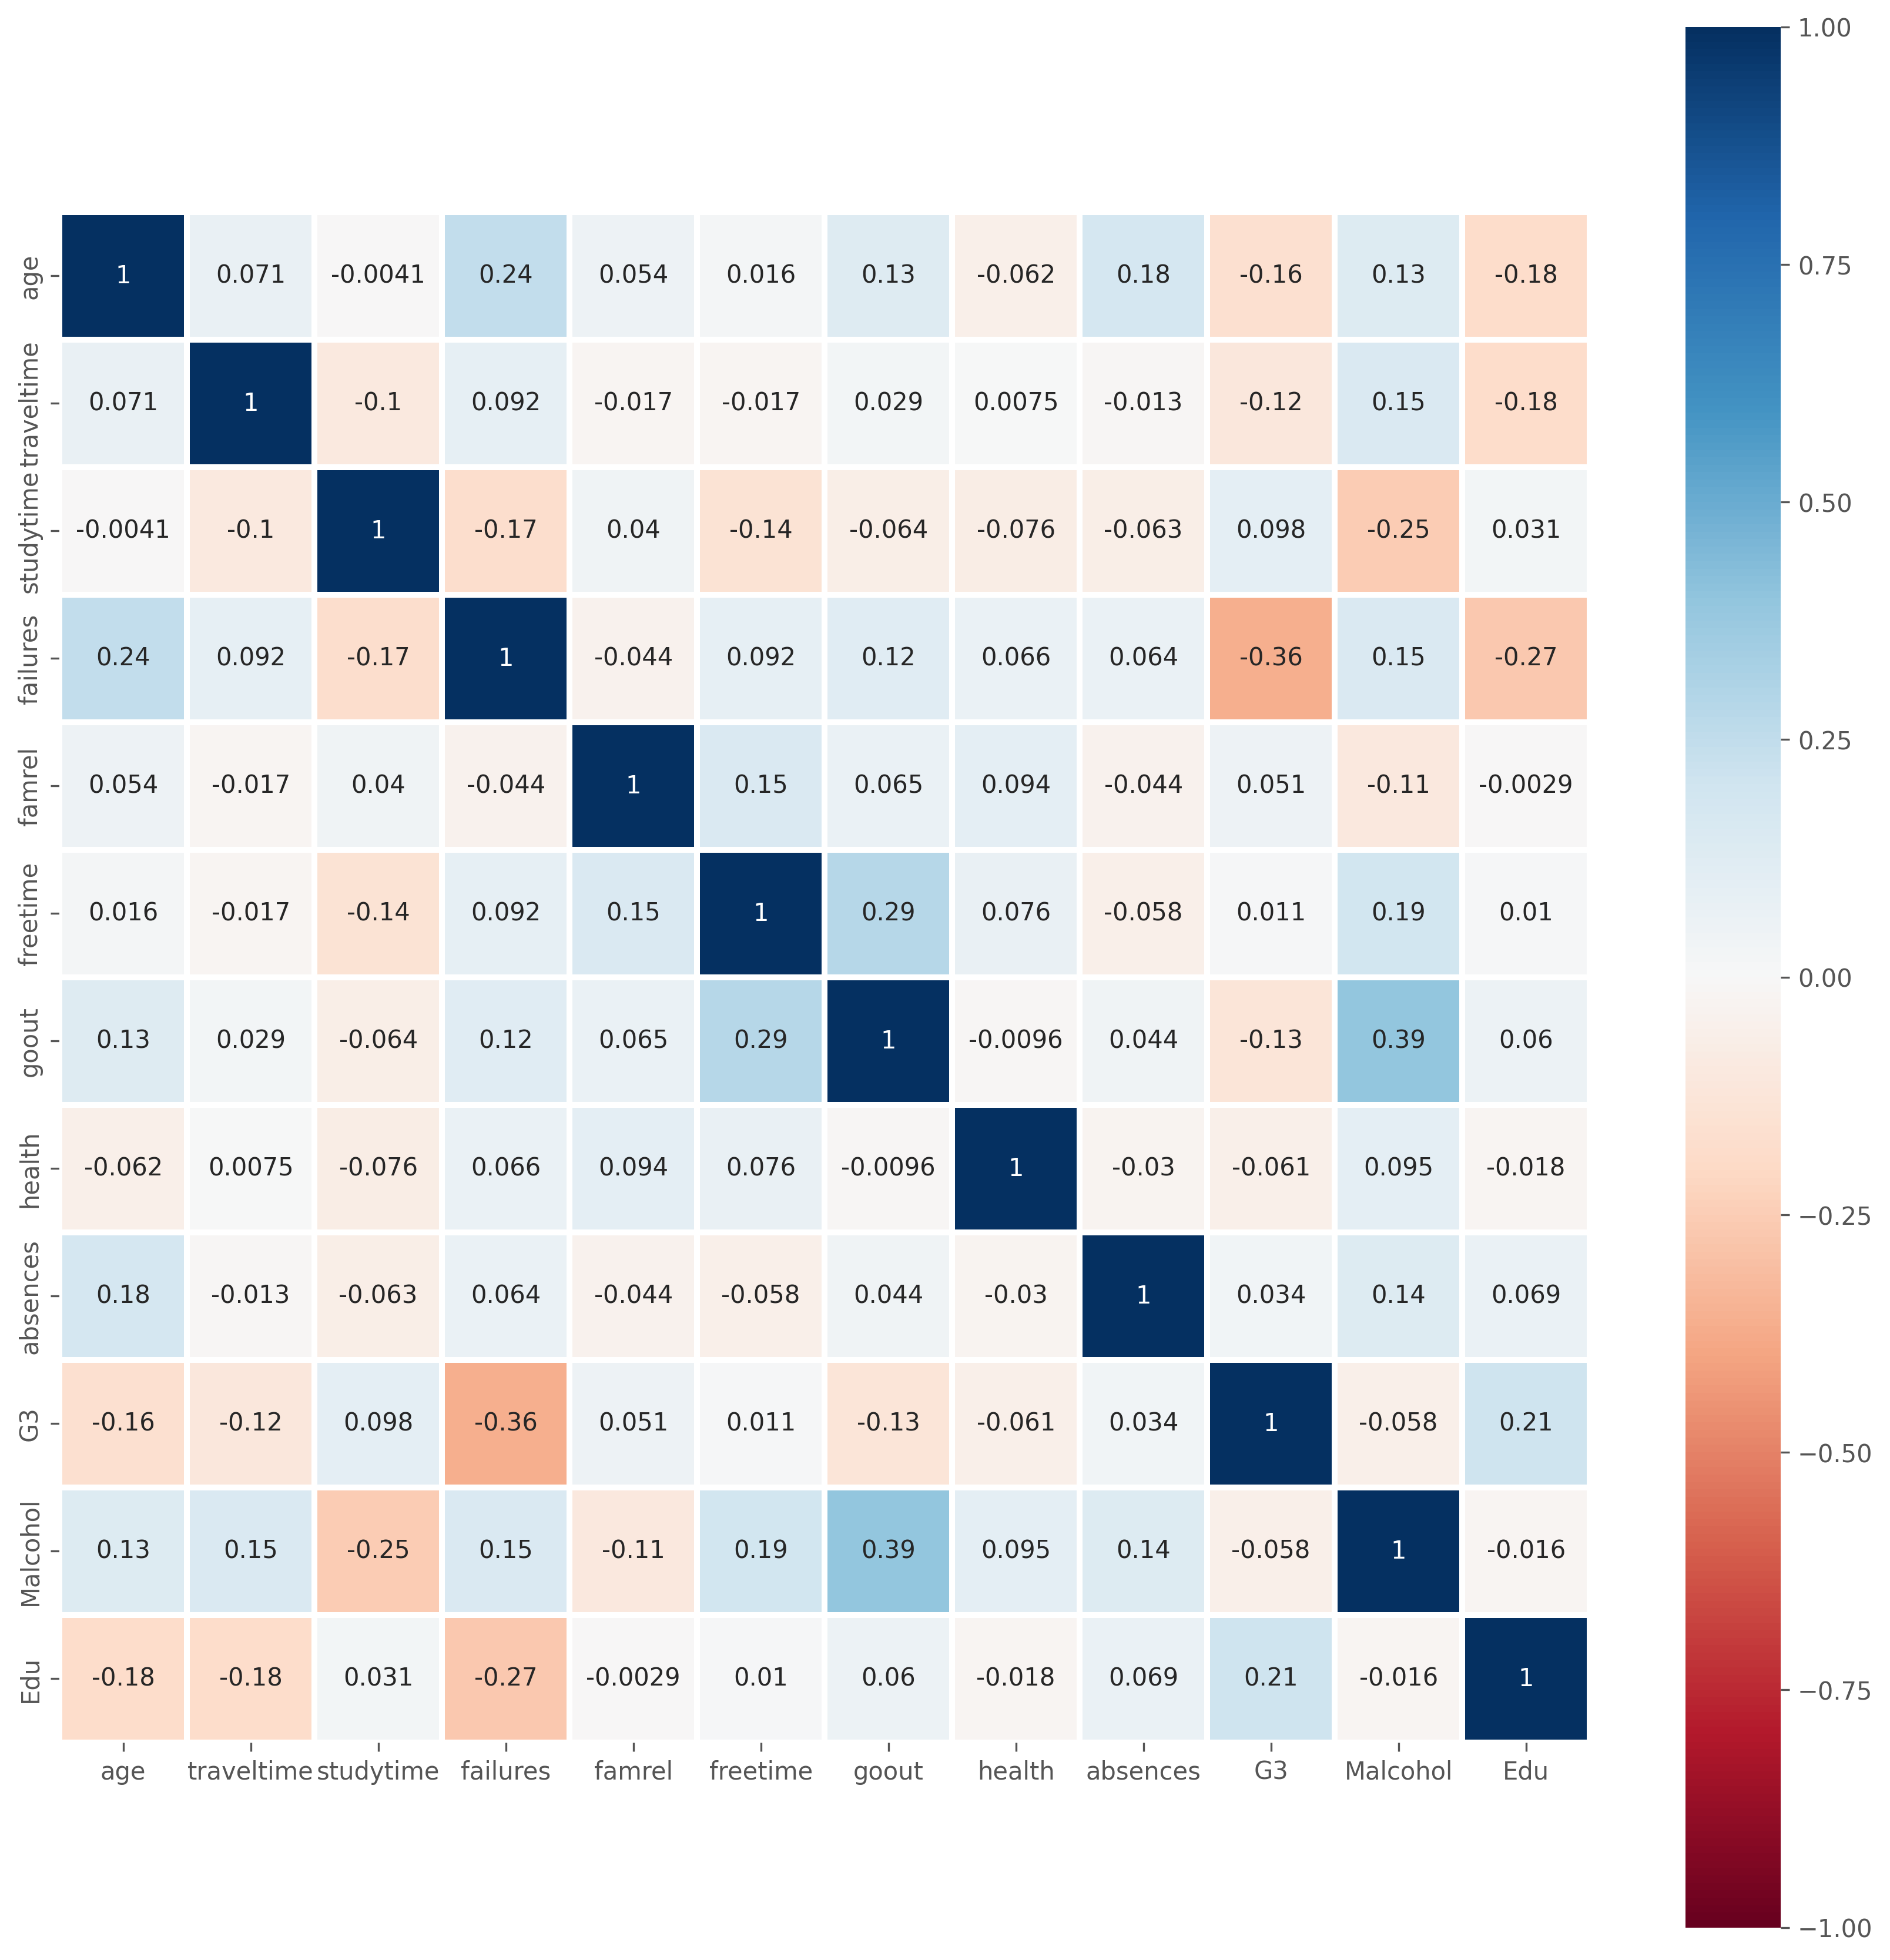

In [31]:
fig, ax = plt.subplots(figsize=(14, 14), dpi=300) 


sb.heatmap(
    new_df_mat.corr(numeric_only=True), 
    vmin=-1, vmax=1,
    square=True, lw=2,
    annot=True, cmap="RdBu",
    ax=ax,
)
plt.show()

La librería Pingouin tiene una de las implementaciones más completas. Con la función corr() se obtiene, además del coeficiente de correlación, su significancia, intervalo de confianza y poder estadístico entre otros. Fuente: https://cienciadedatos.net/documentos/pystats05-correlacion-lineal-python

In [ ]:
!pip install pingouin

Interpretación de penguin
- r, la correlación 
- p-val indica si se debe a una casualidad (p-val>0.05) o puede ser significativa (p-val<0.05).
- CI es el intervalo de confianza, que estás 95% seguro de que el verdadero coeficiente de correlación de la población se encuentra entre X1 y X2
- BF10, factor de Bayes que indica la fuerza de la evidencia a favor de la hipótesis alternativa (que hay una correlación) frente a la hipótesis nula (que no hay correlación). Un valor tan alto (más de 10) sugiere una evidencia muy fuerte en favor de la hipótesis alternativa.
- power, indica la probabilidad de encontrar una relación si existe.

In [91]:
# Cálculo de correlación, significancia e intervalos con pingouin
# ==============================================================================
display(pg.corr(df_mat['failures'], df_mat['G3'], method='pearson'))
#display(pg.corr(df_mat['failures'], df_mat['G3'], method='spearman'))
#display(pg.corr(df_mat['failures'], df_mat['G3'], method='kendall'))

,n,r,CI95%,p-val,BF10,power
pearson,395,-0.360415,"[-0.44, -0.27]",1.465663e-13,4.114e+10,1.0


,n,r,CI95%,p-val,power
spearman,395,-0.361224,"[-0.44, -0.27]",1.281880e-13,1.0


,n,r,CI95%,p-val,power
kendall,395,-0.299185,"[-0.39, -0.21]",6.366094e-13,0.999984


In [115]:
# Crear una lista para almacenar los resultados
correlation_results = []

df_encoded = pd.get_dummies(df_mat, drop_first=True)  # drop_first evita la multicolinealidad

# Seleccionamos todas las columnas (todas ahora son numéricas)
numeric_cols = df_encoded.select_dtypes(include=['float64', 'int64', 'bool']).columns


# Iterar sobre todas las columnas del DataFrame
for column in numeric_cols:
    if column not in ['G3']:  # Excluir 'G3' de la comparación
        # Calcular la correlación de Pearson entre 'failures' y la columna actual
        correlation = pg.corr(df_encoded['G3'], df_encoded[column], method='pearson')
        
        # Almacenar los resultados en la lista
        correlation_results.append({
            'Variable': column,
            'r': correlation['r'].values[0],
            'p-val': correlation['p-val'].values[0],
            'n': correlation['n'].values[0],
            'CI95': correlation['CI95%'].values[0].tolist()
        })
        
correlation_df = pd.DataFrame(correlation_results)

# Mostrar los resultados
display(correlation_df)

,Variable,r,p-val,n,CI95
0,age,-0.161579,1.271439e-03,395,"[-0.26, -0.06]"
1,Medu,0.217147,1.336107e-05,395,"[0.12, 0.31]"
2,Fedu,0.152457,2.379973e-03,395,"[0.05, 0.25]"
3,traveltime,-0.117142,1.986983e-02,395,"[-0.21, -0.02]"
4,studytime,0.097820,5.206115e-02,395,"[-0.0, 0.19]"
5,failures,-0.360415,1.465663e-13,395,"[-0.44, -0.27]"
6,famrel,0.051363,3.085520e-01,395,"[-0.05, 0.15]"
7,freetime,0.011307,8.227402e-01,395,"[-0.09, 0.11]"
8,goout,-0.132791,8.229000e-03,395,"[-0.23, -0.03]"
9,Dalc,-0.054660,2.784915e-01,395,"[-0.15, 0.04]"


In [89]:
correlation_results = []

df_encoded = pd.get_dummies(df_mat, drop_first=True)  # drop_first evita la multicolinealidad

# Seleccionamos todas las columnas (todas ahora son numéricas)
numeric_cols = df_encoded.select_dtypes(include=['float64', 'int64', 'bool']).columns

# Almacenamos los resultados en un DataFrame
correlation_results = []

# Iterar sobre cada columna numérica
for col in numeric_cols:
    if col != 'G3':  # Evitar calcular la correlación de G3 consigo mismo
        pearson_corr = pg.corr(df_encoded['G3'], df_encoded[col], method='pearson')
        spearman_corr = pg.corr(df_encoded['G3'], df_encoded[col], method='spearman')
        kendall_corr = pg.corr(df_encoded['G3'], df_encoded[col], method='kendall')
        
        # Guardar los resultados en una lista
        correlation_results.append({
            'Variable': col,
            'Pearson Correlation': pearson_corr['r'].values[0],
            'Pearson p-value': pearson_corr['p-val'].values[0],
            'Spearman Correlation': spearman_corr['r'].values[0],
            'Spearman p-value': spearman_corr['p-val'].values[0],
            'Kendall Correlation': kendall_corr['r'].values[0],
            'Kendall p-value': kendall_corr['p-val'].values[0],
        })

# Crear un DataFrame con los resultados
correlation_df = pd.DataFrame(correlation_results)

# Mostrar los resultados
display(correlation_df)

,Variable,Pearson Correlation,Pearson p-value,Spearman Correlation,Spearman p-value,Kendall Correlation,Kendall p-value
0,age,-0.161579,1.271439e-03,-0.173438,5.354722e-04,-0.134471,4.893167e-04
1,Medu,0.217147,1.336107e-05,0.225036,6.290448e-06,0.174766,8.280382e-06
2,Fedu,0.152457,2.379973e-03,0.170049,6.895636e-04,0.132405,7.030994e-04
3,traveltime,-0.117142,1.986983e-02,-0.120530,1.654591e-02,-0.098996,1.708821e-02
4,studytime,0.097820,5.206115e-02,0.105170,3.667358e-02,0.085112,3.379330e-02
5,failures,-0.360415,1.465663e-13,-0.361224,1.281880e-13,-0.299185,6.366094e-13
6,famrel,0.051363,3.085520e-01,0.054977,2.757107e-01,0.044007,2.716000e-01
7,freetime,0.011307,8.227402e-01,-0.004994,9.211901e-01,-0.003746,9.240350e-01
8,goout,-0.132791,8.229000e-03,-0.166119,9.192641e-04,-0.130110,8.182581e-04
9,Dalc,-0.054660,2.784915e-01,-0.120944,1.617510e-02,-0.097154,1.821330e-02


/home/ccanamero/.pyenv/versions/3.11.0/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 18.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


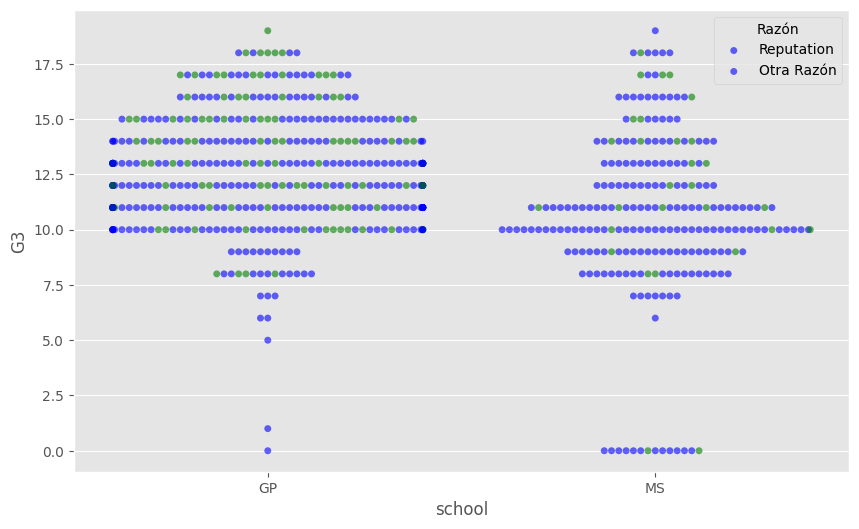

In [9]:
# Leer el archivo CSV
df = pd.read_csv('student/student-por.csv', delimiter=';')

# Crear una columna en df para categorizar los colores según el valor de la columna 'reason'
df['color'] = df['reason'].apply(lambda x: 'green' if x == 'reputation' else 'blue')

# Crear el gráfico de puntos (swarmplot) con la nueva columna de color como hue
plt.figure(figsize=(10, 6))
sb.swarmplot(y="G3", x="school", data=df, hue="color", palette={'green': 'green', 'blue': 'blue'}, alpha=0.6)

# Añadir etiquetas a los ejes
plt.xlabel("school")
plt.ylabel("G3")

# Ajustar la leyenda y mostrar la gráfica
plt.legend(title='Razón', labels=['Reputation', 'Otra Razón'])
plt.show()

# Eliminar la columna de color
df.drop(columns=['color'], inplace=True)

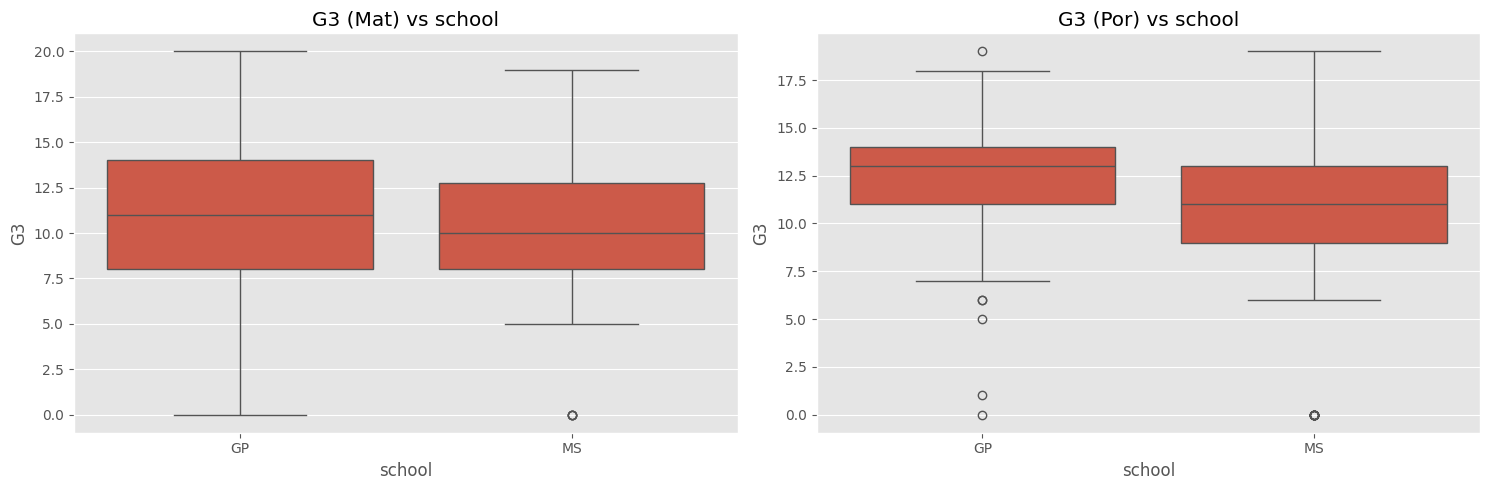

In [60]:
# Leer el archivo CSV
df_mat = pd.read_csv('student/student-mat.csv', delimiter=';')
df_por = pd.read_csv('student/student-por.csv', delimiter=';')

# Crea una figura con tres subplots (una fila y tres columnas)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Crea cada boxplot en un subplot específico
sb.boxplot(ax=axes[0], x='school', y='G3', data=df_mat)
axes[0].set_title('G3 (Mat) vs school')

sb.boxplot(ax=axes[1], x='school', y='G3', data=df_por)
axes[1].set_title('G3 (Por) vs school')

# Ajusta el espacio entre los subplots
plt.tight_layout()

# Muestra la figura completa
plt.show()

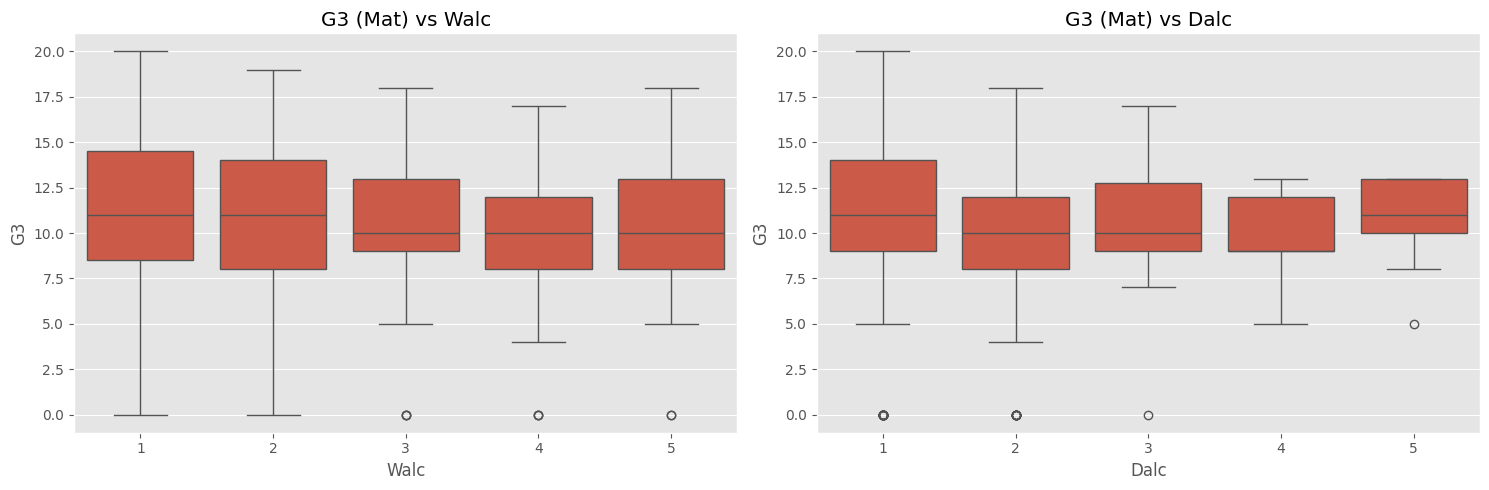

In [40]:
# Leer el archivo CSV
df_mat = pd.read_csv('student/student-mat.csv', delimiter=';')
df_por = pd.read_csv('student/student-por.csv', delimiter=';')

# Crea una figura con tres subplots (una fila y tres columnas)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Crea cada boxplot en un subplot específico
sb.boxplot(ax=axes[0], x='Walc', y='G3', data=df_mat)
axes[0].set_title('G3 (Mat) vs Walc')

sb.boxplot(ax=axes[1], x='Dalc', y='G3', data=df_mat)
axes[1].set_title('G3 (Mat) vs Dalc')

# Ajusta el espacio entre los subplots
plt.tight_layout()

# Muestra la figura completa
plt.show()

ValueError: Could not interpret value `Fjob` for `x`. An entry with this name does not appear in `data`.

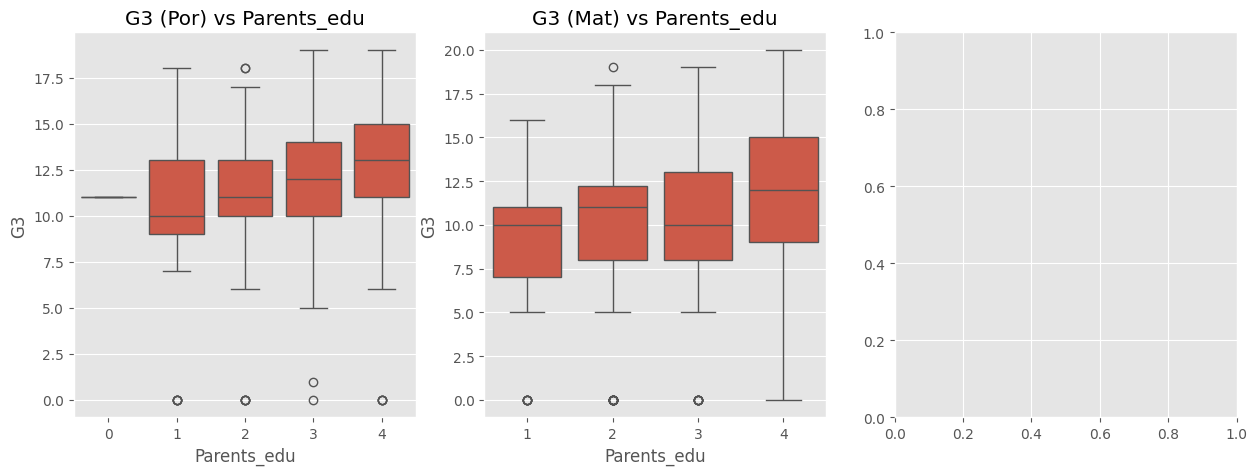

In [51]:
# Leer el archivo CSV
df_mat = pd.read_csv('Datasets_modificados/matematicas/mat-grouped-and-cleanned.csv', delimiter=';')
df_por = pd.read_csv('Datasets_modificados/portugues/por-grouped-and-cleanned.csv', delimiter=';')

# Crea una figura con tres subplots (una fila y tres columnas)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Crea cada boxplot en un subplot específico
sb.boxplot(ax=axes[0], x='Parents_edu', y='G3', data=df_por)
axes[0].set_title('G3 (Por) vs Parents_edu')

sb.boxplot(ax=axes[1], x='Parents_edu', y='G3', data=df_mat)
axes[1].set_title('G3 (Mat) vs Parents_edu')

# Ajusta el espacio entre los subplots
plt.tight_layout()

# Muestra la figura completa
plt.show()


Text(0.5, 1.0, 'G3 (por) vs Fjob')

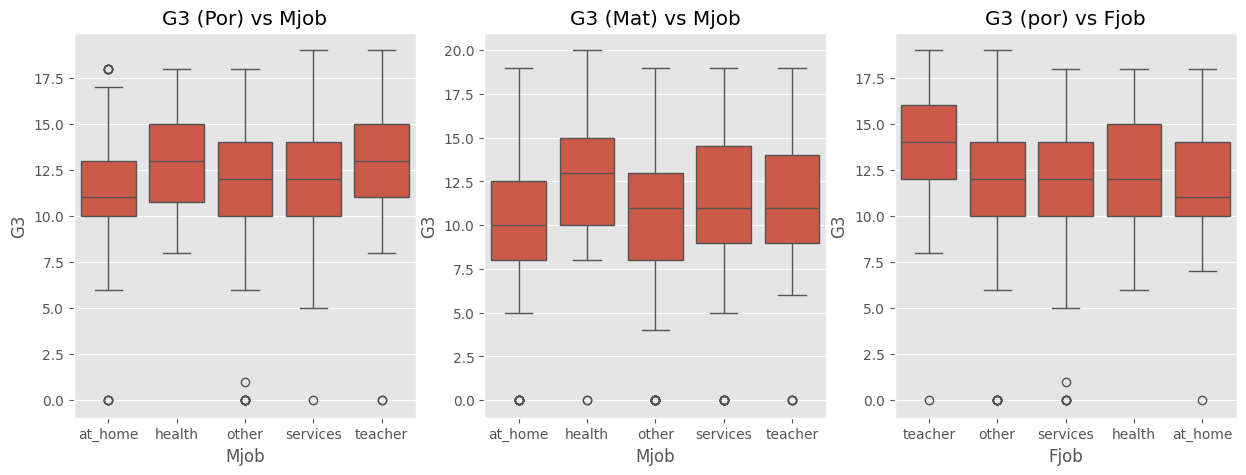

In [52]:
# Leer el archivo CSV
df_mat = pd.read_csv('student/student-mat.csv', delimiter=';')
df_por = pd.read_csv('student/student-por.csv', delimiter=';')

# Crea una figura con tres subplots (una fila y tres columnas)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Crea cada boxplot en un subplot específico
sb.boxplot(ax=axes[0], x='Mjob', y='G3', data=df_por)
axes[0].set_title('G3 (Por) vs Mjob')

sb.boxplot(ax=axes[1], x='Mjob', y='G3', data=df_mat)
axes[1].set_title('G3 (Mat) vs Mjob')

sb.boxplot(ax=axes[2], x='Fjob', y='G3', data=df_por)
axes[2].set_title('G3 (por) vs Fjob') 

"sb.boxplot(ax=axes[2], x='Fjob', y='G3', data=df_por)\naxes[2].set_title('G3 (por) vs Fjob')  "

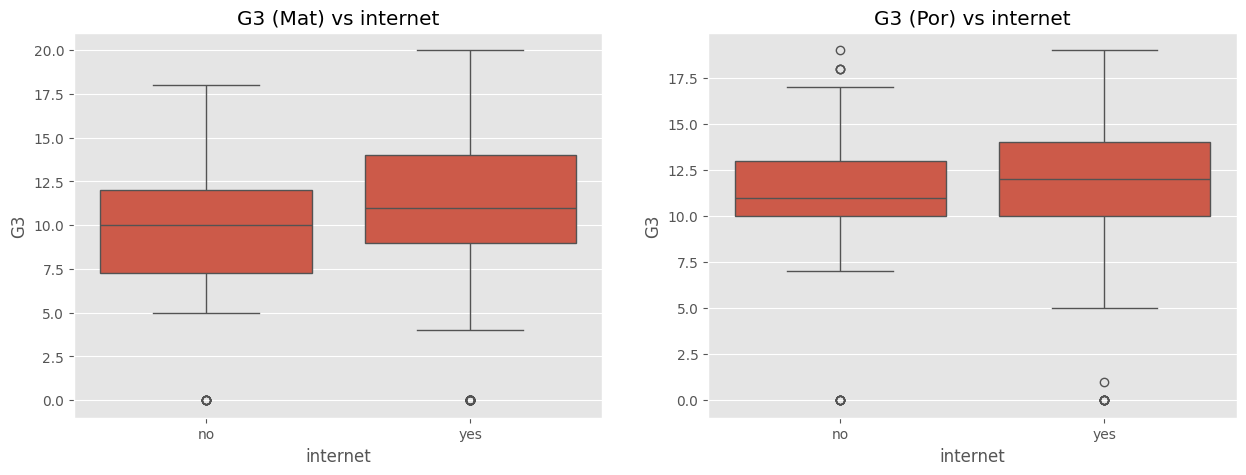

In [57]:
# Leer el archivo CSV
df_mat = pd.read_csv('student/student-mat.csv', delimiter=';')
df_por = pd.read_csv('student/student-por.csv', delimiter=';')

# Crea una figura con tres subplots (una fila y tres columnas)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Crea cada boxplot en un subplot específico
sb.boxplot(ax=axes[0], x='internet', y='G3', data=df_mat)
axes[0].set_title('G3 (Mat) vs internet')

sb.boxplot(ax=axes[1], x='internet', y='G3', data=df_por)
axes[1].set_title('G3 (Por) vs internet')

"""sb.boxplot(ax=axes[2], x='Fjob', y='G3', data=df_por)
axes[2].set_title('G3 (por) vs Fjob')  """

color   Aprobados  Suspensos
school                      
GP            236        113
MS             29         17


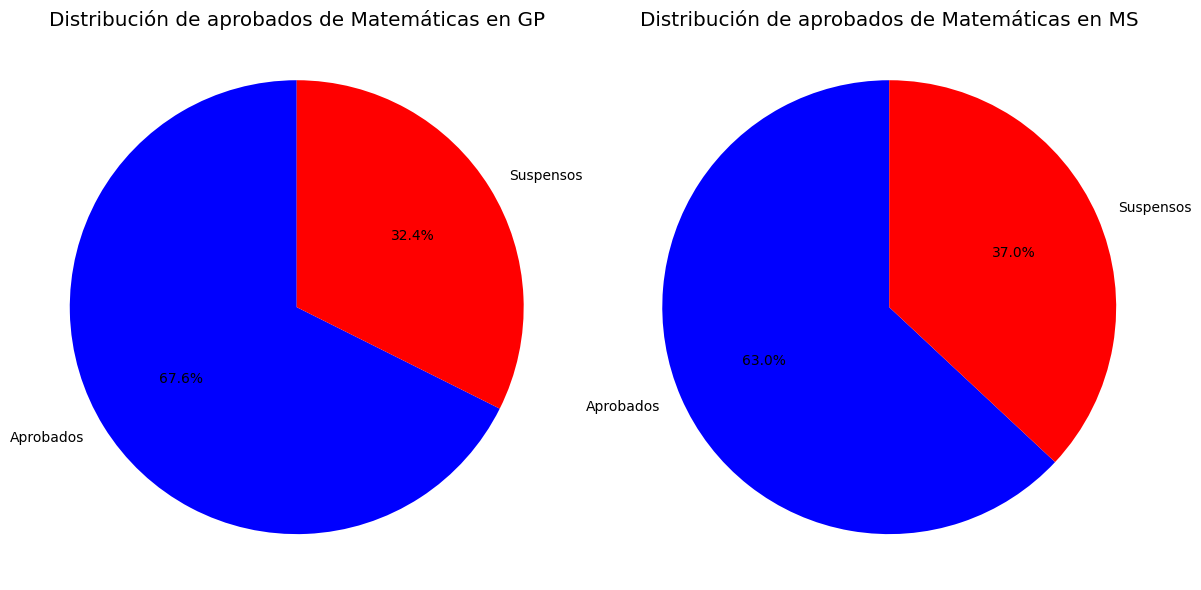

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Supongamos que df_mat ya está definido y contiene la columna G3.

# Crear una columna en `df_mat` para categorizar los puntos según el valor de G3
df_mat['color'] = df_mat['G3'].apply(lambda x: 'Suspensos' if x < 10 else 'Aprobados')

# Calcular la proporción de estudiantes en cada categoría agrupados por escuela
color_counts_by_school = df_mat.groupby('school')['color'].value_counts().unstack()
print(color_counts_by_school)

# Crear gráficos de pastel para cada escuela
plt.figure(figsize=(12, 6))

for idx, school in enumerate(color_counts_by_school.index):
    plt.subplot(1, len(color_counts_by_school.index), idx + 1)  # Crear subgráficos
    plt.pie(color_counts_by_school.loc[school], labels=color_counts_by_school.columns, 
            colors=['blue', 'red'], autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribución de aprobados de Matemáticas en {school}')
    plt.axis('equal')

# Ajustar el diseño
plt.tight_layout()
plt.show()


In [3]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

# Asegúrate de que 'df_por' es tu DataFrame y tiene la columna 'G3'
# Crear una columna en `df_por` para categorizar los puntos según el valor de G3
df_por['color'] = df_por['G3'].apply(lambda x: 'Suspenso' if x < 10 else 'Aprobado')

# Crear el gráfico de puntos (swarmplot) con la nueva columna de color como hue
plt.figure(figsize=(10, 6))
sb.swarmplot(y="G3", x="school", data=df_por, hue="color", palette={'Suspenso': 'red', 'Aprobado': 'blue'}, alpha=0.6)

# Añadir etiquetas a los ejes
plt.xlabel("school")
plt.ylabel("G3")

# Ajustar la leyenda
plt.legend(title='Resultados en Portugués', labels=['Suspensos (G3 < 10)', 'Aprobados (G3 >= 10)'], 
           handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10)])

plt.show()



NameError: name 'df_por' is not defined

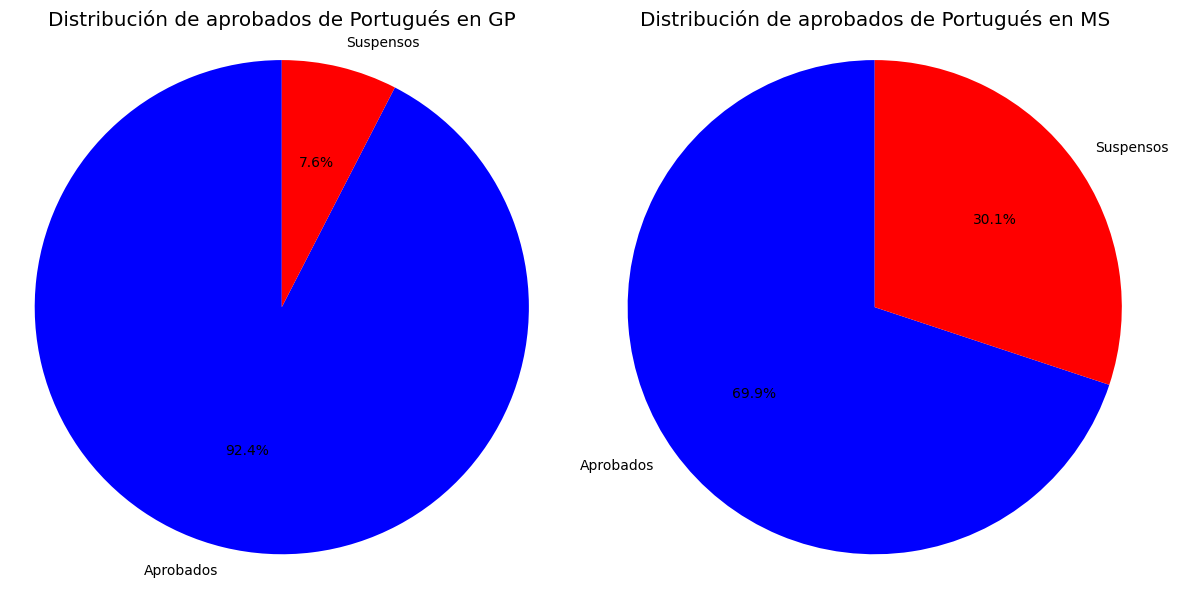

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Supongamos que df_por ya está definido y contiene la columna G3.

# Crear una columna en `df_por` para categorizar los puntos según el valor de G3
df_por['color'] = df_por['G3'].apply(lambda x: 'Suspensos' if x < 10 else 'Aprobados')

# Calcular la proporción de estudiantes en cada categoría agrupados por escuela
color_counts_by_school = df_por.groupby('school')['color'].value_counts().unstack()

# Crear gráficos de pastel para cada escuela
plt.figure(figsize=(12, 6))

for idx, school in enumerate(color_counts_by_school.index):
    plt.subplot(1, len(color_counts_by_school.index), idx + 1)  # Crear subgráficos
    plt.pie(color_counts_by_school.loc[school], labels=color_counts_by_school.columns,
            colors=['blue', 'red'], autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribución de aprobados de Portugués en {school}')
    plt.axis('equal')

# Ajustar el diseño
plt.tight_layout()
plt.show()